### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.figure_factory import create_table

### Problems

Use the prompts below to get started with your data analysis.  




1. Read in the `coupons.csv` file.

In [245]:
data = pd.read_csv('data/coupons.csv')

In [246]:
data.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [247]:
# Looking at the format of categorical data, if it needs any reformatting or removal the special characters
df = data
from pprint import pprint
for col in df.select_dtypes(include='object').columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{df[col].unique()} : {df[col].nunique()}")
    print()

'++++++++++++++++++destination++++++++++++++++++'
"['No Urgent Place' 'Home' 'Work'] : 3"

'++++++++++++++++++passanger++++++++++++++++++'
"['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] : 4"

'++++++++++++++++++weather++++++++++++++++++'
"['Sunny' 'Rainy' 'Snowy'] : 3"

'++++++++++++++++++time++++++++++++++++++'
"['2PM' '10AM' '6PM' '7AM' '10PM'] : 5"

'++++++++++++++++++coupon++++++++++++++++++'
("['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'\n"
 " 'Restaurant(20-50)'] : 5")

'++++++++++++++++++expiration++++++++++++++++++'
"['1d' '2h'] : 2"

'++++++++++++++++++gender++++++++++++++++++'
"['Female' 'Male'] : 2"

'++++++++++++++++++age++++++++++++++++++'
"['21' '46' '26' '31' '41' '50plus' '36' 'below21'] : 8"

'++++++++++++++++++maritalStatus++++++++++++++++++'
"['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] : 5"

'++++++++++++++++++education++++++++++++++++++'
("['Some college - no degree' 'Bachelors degree' 'Associates degree'\n"
 " 'High School Gr

In [248]:
# formating 'age' column
def format_column(col_val):
    import re
    patterns = {r"[^\d.]+": " "}
    if isinstance(col_val, str):
        for pattern, val in patterns.items():
            col_val = re.sub(pattern, val, col_val)
        return str(col_val).rstrip().lstrip()

df['age'] = df['age'].apply(format_column)
df['age'].value_counts()


21    3200
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
Name: age, dtype: int64

In [249]:
# formatting 'income' column
df_copy = df.copy()
df['income'] = df_copy['income'].str.split('-').apply(lambda x: x[0] if len(x) == 2 else (x[0].split())[0] if x[0].split().count('or') == 1 else x[0].split('than')[1])
df['income'] = df['income'].str.replace('$','')
df['income'].value_counts()

C:\Users\Plamen\AppData\Local\Temp\ipykernel_36376\3754241111.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



25000     2013
12500     1831
37500     1805
100000    1736
50000     1659
 12500    1042
87500      895
75000      857
62500      846
Name: income, dtype: int64

##### Conclusion: Data is pretty consistent and clear. Removing the special characters, it won't make it much clear. Only formatting is needed at 'age' and 'income' column!

3. Decide what to do about your missing data -- drop, replace, other...

In [250]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [251]:
df.count().head(20)

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

```
Total count: 
 25  Y                     12684 non-null  int64 
 
Missing data ( NaN )
 14  car                   108 non-null    object
 15  Bar                   12577 non-null  object
 16  CoffeeHouse           12467 non-null  object
 17  CarryAway             12533 non-null  object
 18  RestaurantLessThan20  12554 non-null  object
 19  Restaurant20To50      12495 non-null  object
 
Decision: 
    1) Drop column "car".   df.drop('car', axis=1, inplace=True)
    2) Replace NaN with 0.  "df.fillna(0)"
```

In [253]:
count_min = 12467
count_car =108
print(f"The df['car'] column contains data {round((count_car*100/count_min),1)}% of the sample data, so it will be dropped!")

The df['car'] column contains data 0.9% of the sample data, so it will be dropped!


In [254]:
df[df['car'].apply(lambda x: isinstance(x,str))].shape[0]

108

In [255]:
df.count().idxmin()

'car'

In [256]:
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [257]:
# drop df['car'] column as it contains less than 1% data 
df = df.drop('car', axis=1)

In [258]:
df_new = df.dropna()

In [259]:
print(f"After Cleaning NaN, Data loss is {round(((df.shape[0] - df_new.shape[0]) / df.shape[0]) * 100,1)}%, so will fill it in with 0!")

After Cleaning NaN, Data loss is 4.8%, so will fill it in with 0!


In [260]:
df_new = df.fillna(0)

In [261]:
df = data
from pprint import pprint
for col in df_new.select_dtypes(include='object').columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{df_new[col].unique()} : {df_new[col].nunique()}")
    print()

'++++++++++++++++++destination++++++++++++++++++'
"['No Urgent Place' 'Home' 'Work'] : 3"

'++++++++++++++++++passanger++++++++++++++++++'
"['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] : 4"

'++++++++++++++++++weather++++++++++++++++++'
"['Sunny' 'Rainy' 'Snowy'] : 3"

'++++++++++++++++++time++++++++++++++++++'
"['2PM' '10AM' '6PM' '7AM' '10PM'] : 5"

'++++++++++++++++++coupon++++++++++++++++++'
("['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'\n"
 " 'Restaurant(20-50)'] : 5")

'++++++++++++++++++expiration++++++++++++++++++'
"['1d' '2h'] : 2"

'++++++++++++++++++gender++++++++++++++++++'
"['Female' 'Male'] : 2"

'++++++++++++++++++age++++++++++++++++++'
"['21' '46' '26' '31' '41' '50' '36'] : 7"

'++++++++++++++++++maritalStatus++++++++++++++++++'
"['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] : 5"

'++++++++++++++++++education++++++++++++++++++'
("['Some college - no degree' 'Bachelors degree' 'Associates degree'\n"
 " 'High School Graduate' 'Gradu

4. What proportion of the total observations chose to accept the coupon? 



In [262]:
cnt_total = df_new.shape[0]
cnt_accept = df_new.query('Y == 1').shape[0]
proportion_accepted = round(((cnt_accept*100) / cnt_total),2)
print(f"Accept of the coupon is {proportion_accepted}%")

Accept of the coupon is 56.84%


In [263]:
df_accept = df_new.query('Y == 1').head(15)
df_accept

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1


In [264]:
df_c = df_accept.groupby(['coupon','passanger']).count()
df_c = df_c.reset_index()
fig = px.histogram(df_c, y='gender', x='passanger', color='coupon', title='Number of Coupons accepted by the Driver')
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of gender", "count of coupons")))
fig.for_each_yaxis(lambda a: a.update(title_text=a.title.text.replace("sum of gender", "count of coupons")))

[Text(0, 0, 'Alone'),
 Text(1, 0, 'Friend(s)'),
 Text(2, 0, 'Kid(s)'),
 Text(3, 0, 'Partner')]

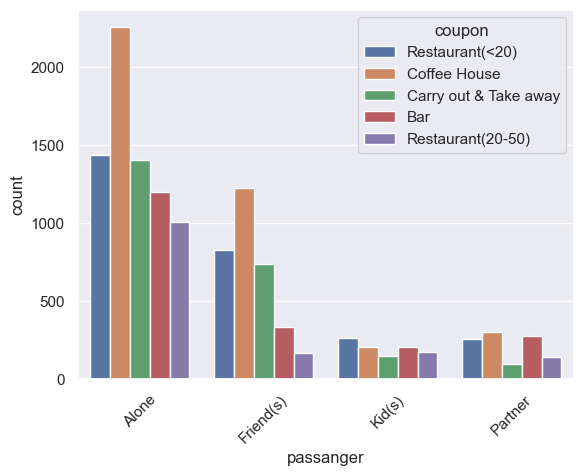

In [265]:
coupon_plot = sns.countplot(df_new, x="passanger", hue='coupon')
coupon_plot.set_xticklabels(coupon_plot.get_xticklabels(), rotation=45)


5. Use a bar plot to visualize the `coupon` column.

C:\Users\Plamen\AppData\Local\Temp\ipykernel_36376\2827689645.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

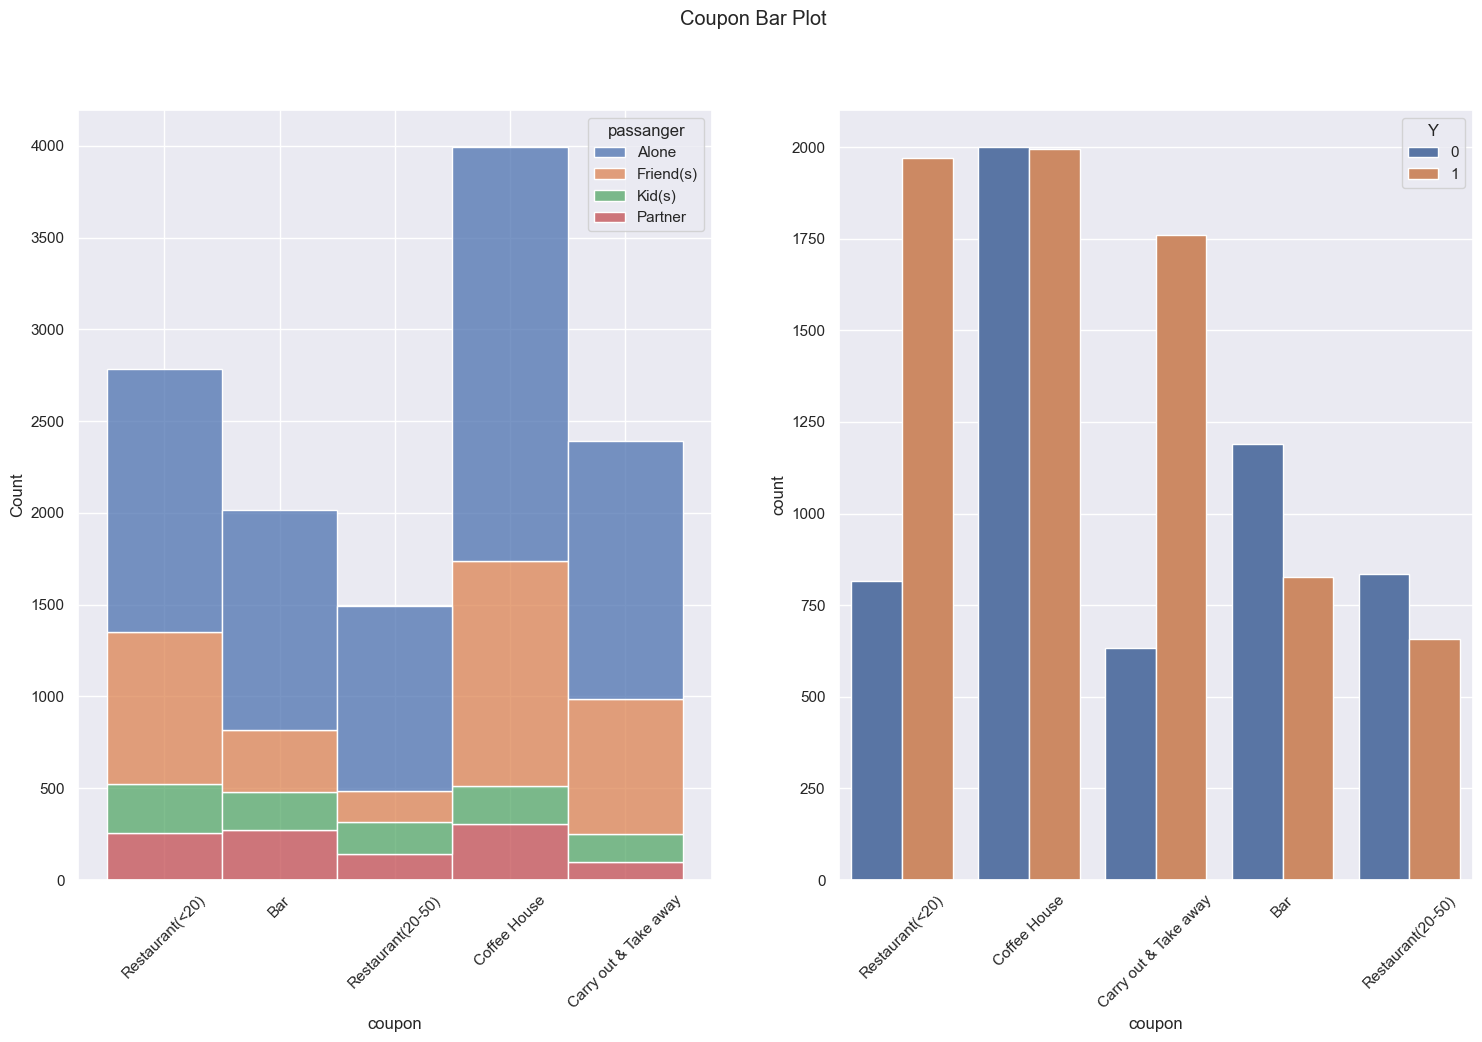

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Coupon Bar Plot')
df_coupon = df_new.groupby('passanger', group_keys=True).apply(lambda x:x)[['passanger','coupon']]
chart=sns.histplot(ax=axes[0], data=df_coupon, x="coupon", hue="passanger", multiple="stack")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart1=sns.countplot(ax=axes[1], data=df_new, x='coupon', hue='Y')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)





6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Left Skewed Histogram of Temperature')

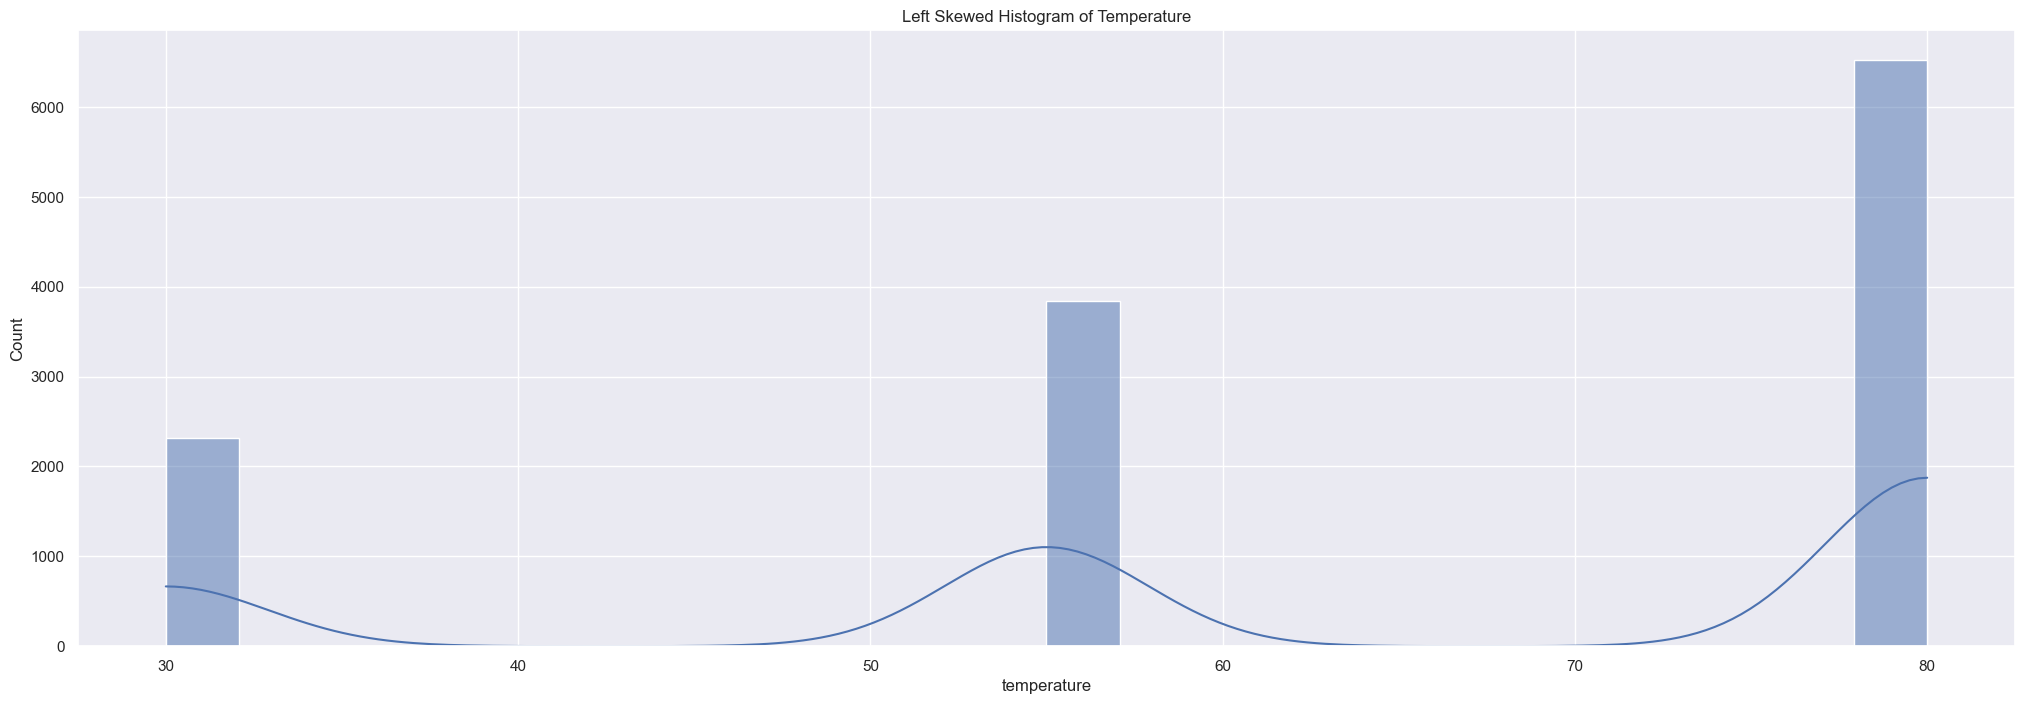

In [267]:
sns.set()
fig, axes = plt.subplots(1,1, figsize=(25,8))
sns.histplot(df_new["temperature"], kde = True)
axes.set_title('Left Skewed Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [268]:
df_bar = df_new.query('coupon == "Bar"')
df_bar_y = df_bar.loc[df_bar['Y'] == 1]
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?

In [269]:
df_cp_t = df_new.groupby(['coupon','Y'],group_keys=True).apply(lambda x: x)[['passanger']].reset_index()
ds_cp=df_cp_t.query("coupon == 'Bar'")[['coupon','Y']].value_counts()
df_cp =ds_cp.to_frame()
df_cp.rename(columns={0:'Count'}, inplace=True)
df_cp

Count
coupon Y       
Bar    0   1190
       1    827

In [270]:
total_bar_cnt = df_bar.shape[0]
accepted_bar_cnt = df_bar_y.shape[0]
accepted_bar_ratio = round(((accepted_bar_cnt*100)/total_bar_cnt),2)
print(f"Acceptance rate of 'Bar' coupon is {accepted_bar_ratio}%.")

Acceptance rate of 'Bar' coupon is 41.0%.


##### Conclusion: acceptance portion is 827 coupons and acceptance rate ois 41.0%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [271]:
df_comp_t2 = df_bar[df_bar['Y'] == 1].groupby('Bar', group_keys=True).apply(lambda x:x)[['coupon','Bar']]
df_comp_t1 = df_comp_t2.rename(columns={'Bar':'Bar_col'})
ds_comp = df_comp_t1.value_counts()
df_comp_t = ds_comp.to_frame()
df_comp_t.rename(columns={0:'Count'}, inplace=True)
df_comp = df_comp_t.reset_index()
df_comp.rename(columns={'Bar_col':'Bar'}, inplace=True)
df_comp

,coupon,Bar,Count
0,Bar,1~3,257
1,Bar,less1,253
2,Bar,never,156
3,Bar,4~8,117
4,Bar,gt8,36
5,Bar,0,8


In [272]:
total_bar_cpn = df_bar_y.shape[0]
less3 = df_bar_y.query("Bar in ['1~3'] or Bar in ['less1']")[['Bar']]
less3_cnt = less3.shape[0]
more3 = df_bar_y.query("Bar in ['4~8'] or Bar in ['gt8']")[['Bar']]
more3_cnt = more3.shape[0]
more3_cnt
less3_accept_ratio = round(((less3_cnt*100)/total_bar_cnt),2)
more3_accept_ration = round(((more3_cnt*100)/total_bar_cnt),2)
print(f"Attendance rate for 3 or less times of an attendance in the Bar is {less3_accept_ratio}%")
print(f"Attendance rate for more than 3 times of an attendance in the Bar is {more3_accept_ration}%")

Attendance rate for 3 or less times of an attendance in the Bar is 25.29%
Attendance rate for more than 3 times of an attendance in the Bar is 7.59%


##### Conclusion: drivers who went to a bar 3 or fewer times a month have attendance rate of 61.67%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [273]:
df_bar_driver = df_bar_y.loc[df_bar_y['age'].astype('int') > 25].query("CarryAway not in ['less1','never', 0]")
driver_bar_cnt = df_bar_driver['CarryAway'].shape[0]
total_bar_cnt = df_bar_y['CarryAway'].shape[0]
driver_accept_rate_25 = round(((driver_bar_cnt*100)/total_bar_cnt),2)
driver_accept_rate_rest = round((((total_bar_cnt - driver_bar_cnt) * 100) / total_bar_cnt),2)
print(f"Attendance rate for drivers 'go to a bar more than once a month and are over the age of 25' is {driver_accept_rate_25}%")
print(f"Attendance rate for other drivers with attendance in the Bar is {driver_accept_rate_rest}%")

Attendance rate for drivers 'go to a bar more than once a month and are over the age of 25' is 60.46%
Attendance rate for other drivers with attendance in the Bar is 39.54%


##### Conclusion: drivers go to a bar more than once a month and are over the age of 25 have rate of 60.46%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [274]:
df_driver_no_kid = df_bar_y.loc[df_bar_y['passanger'] !='Kid(s)'].query("CarryAway not in ['less1','never', 0] and occupation not in ['Farming Fishing & Forestry']")
driver_no_kid_cnt = df_driver_no_kid.shape[0]
driver_bar_total_cnt = df_bar_y['CarryAway'].shape[0]
drv_no_kid_acceptance_rate = round(((driver_no_kid_cnt*100) / driver_bar_total_cnt),2)

print(f"Attendance rate for drivers without a kid on the board is {drv_no_kid_acceptance_rate}%")

Attendance rate for drivers without a kid on the board is 79.93%


##### Conclusion: the drivers without a kid on the board have an attendance rate of 27.32%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [275]:
df_bar_no_kid = df_bar_y.loc[df_bar_y['passanger'] !='Kid(s)'].query("maritalStatus not in ['Widowed'] and CarryAway not in ['less1','never', 0]")
df_bar_30 = df_bar_y.loc[df_bar_y['age'].astype('int') < 30].query("CarryAway not in ['less1','never', 0]")
df_bar_income_50 = df_bar_y.loc[df_bar_y['income'].astype('int') < 50000].query("RestaurantLessThan20 in ['4~8','gt8']")

bar_total_cnt = df_bar_y['CarryAway'].shape[0]
bar_no_kid_cnt = df_bar_no_kid['CarryAway'].shape[0]
bar_30_cnt = df_bar_30['CarryAway'].shape[0]
bar_income_50_cnt = df_bar_income_50['CarryAway'].shape[0]

bar_no_kid_rate = round(((bar_no_kid_cnt*100)/bar_total_cnt),2)
bar_30_rate = round(((bar_30_cnt*100)/bar_total_cnt),2)
bar_income_50_rate = round(((bar_income_50_cnt*100)/bar_total_cnt),2)

print(f"Attendance rate for drivers 'going to bars more than once a month, had passengers that were not a kid, and were not widowed' is {bar_no_kid_rate}%")
print(f"Attendance rate for drivers 'attending a Bar more than once a month under the age of 30' is {bar_30_rate}%")
print(f"Attendance rate for drivers 'going to cheap restaurants more than 4 times a month and income is less than 50K' is {bar_income_50_rate}%")

Attendance rate for drivers 'going to bars more than once a month, had passengers that were not a kid, and were not widowed' is 79.08%
Attendance rate for drivers 'attending a Bar more than once a month under the age of 30' is 45.59%
Attendance rate for drivers 'going to cheap restaurants more than 4 times a month and income is less than 50K' is 18.86%


##### Conclusion: the drivers going to bars more than once a month, had passengers that were not a kid, and were not widowed have the highest attendance rate of 79.08%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Drivers going to bars more than once a month, had passengers that were not a kid, and were not widowed have the highest attendance rate of 79.08%

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  